# Statistics on the corpus

The corpus comes from the digitized newspaper collections of the [Latvian National Library (LNB)](http://periodika.lv/)

- Time: 1800-1900
- Language: German
- Keywords: "Sturm", "Hagel", "Überscwhemmung" (storm, hail, flood)
- Created by searching for articles that contain ANY of the keywords

This notebook presents first statistics regarding the number of entries, their temporal distribution, different periodicals etc.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Importing a modified dataset (has year, date columns, word counts etc.)

input_path = '../data/processed/LNB_processed.xlsx'
df = pd.read_excel(input_path)
df.head()

,date,year,month,day,pub,head,full_text,href,text_len,w_count,sturm,hagel,überschwemmung
0,1800.01.14,1800,1,14,Mitausche Zeitung,"St. Petersburg, vom 23. December","St. Petersburg, vom 23. December\n\nHfsxs xseb...",http://periodika.lv/viewerOpener?issue=/mize18...,10770,1273,True,False,False
1,1800.02.25,1800,2,25,Mitausche Zeitung,Bekanntmachungen,"Bekanntmachungen\n\nDa, ohngeathtet wiederhplt...",http://periodika.lv/viewerOpener?issue=/mize18...,3002,339,True,False,False
2,1800.03.15,1800,3,15,Mitausche Zeitung,Mitau,"Mitau\nMitau\n\n« Midas, den IF. März. Zrgolge...",http://periodika.lv/viewerOpener?issue=/mize18...,10370,1209,True,False,False
3,1800.03.29,1800,3,29,Mitausche Zeitung,Mitau,"Mitau\nMitau\n\nl ·»»xkl,litau, vom gckMörzk D...",http://periodika.lv/viewerOpener?issue=/mize18...,11972,1497,True,False,False
4,1800.04.02,1800,4,2,Rigische Anzeigen,Publicationes.,Publicationes.\n\n?ur Ergänzung der Allerhöchs...,http://periodika.lv/viewerOpener?issue=/p_003_...,7306,860,True,False,False


## Temporal analysis

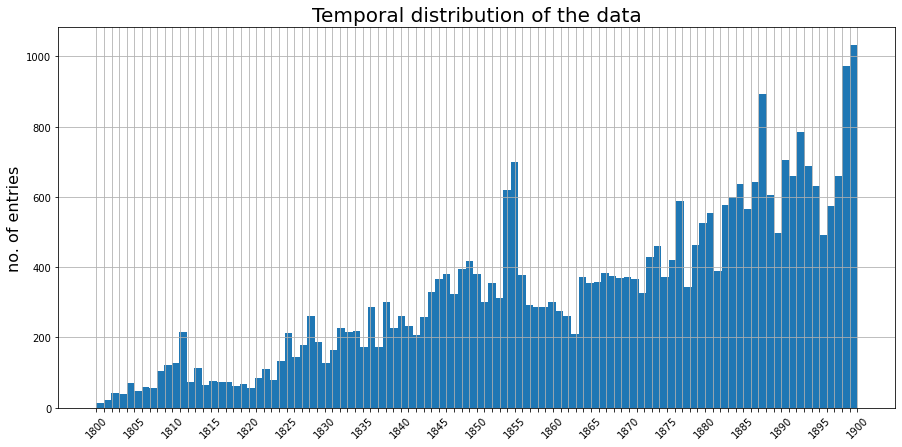

In [6]:
figsize = (15,7)
bins = 101
ticksrange = np.arange(1800,1901)
xlabels = [num if num%5==0 else '' for num in np.arange(1800,1901)]

plt.figure(figsize=figsize)
plt.hist(df.year,bins=bins)
plt.grid(b=True, which='both')
plt.xticks(ticks=ticksrange, labels=xlabels)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Temporal distribution of the data', fontsize=20)
plt.ylabel('no. of entries', fontsize=16)

plt.show()

As expected, the general tendency follows the increase in press volume: newspaper get longer and are published more often, the number of publications grows steadily. Thus, more information over the course of the 19th century.

## Different periodicals and their proportions

In [7]:
print(f'There are {len(df.pub.unique())} different periodicals in the dataset.')

There are 46 different periodicals in the dataset.


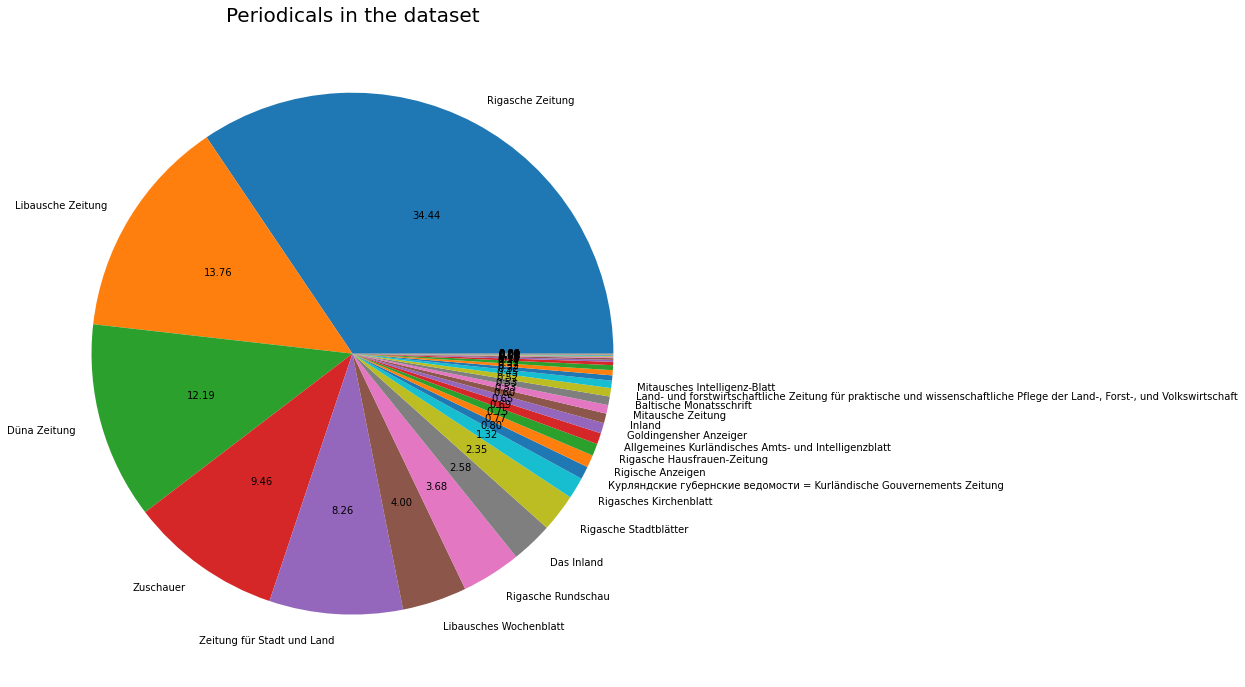

In [8]:
### print a pie chart to show the proportions of different periodicals

# create x(data) and y(labels)
pub_pie_data = df.pub.value_counts()
pub_pie_labels = pub_pie_data.index.tolist()
# remove half of the labels to make the plot more readable
pub_pie_labels[-26:] = ['']*26

plt.figure(figsize=(12,12))
plt.pie(pub_pie_data, labels=pub_pie_labels, autopct='%.2f')
plt.title('Periodicals in the dataset', fontsize=20)

plt.show()

In [9]:
### group dataframe to observe the changing of the proportions of different periodicals
dfpub = df.groupby(['pub', 'year']).size().reset_index(name='obs')

In [10]:
# Generating lineplots for all 46 periodicals is time-consuming, so we'll do this automatically

# function to generate the number of entries/year for a periodical. needs a grouped dataframe dfpub to be present
def generate_pub_freq(pub_name, timespan):
    freqs = []
    for year in timespan:
        try:
            freqs.append(dfpub.obs[(dfpub.pub == pub_name) & (dfpub.year == year)].values[0])
        except:
            freqs.append(0)
    return freqs


# this is a generator that takes the original dataframe as input
def plot_pub_data(dataframe):
    
    df = dataframe.groupby(['pub', 'year']).size().reset_index(name='obs')
    publications = df.pub.unique()
    x_range = np.arange(1800,1901)
    
    for pub in publications:
        pub_y_data = generate_pub_freq(pub, x_range)
        annotation_x_coord = dfpub.year[(dfpub.pub == pub) &
                                        (dfpub.obs == max(dfpub.obs[dfpub.pub == pub]))].values[0]
        annotation_y_coord = max(dfpub.obs[dfpub.pub == pub])
        
        if dataframe.pub.value_counts()[pub] > 300: #add annotation labels for the most prominent publications
            annotation_text = pub
        else:
            annotation_text = ''
        
        yield plt.plot(x_range, pub_y_data), plt.annotate(text=annotation_text, xy=(annotation_x_coord, annotation_y_coord))

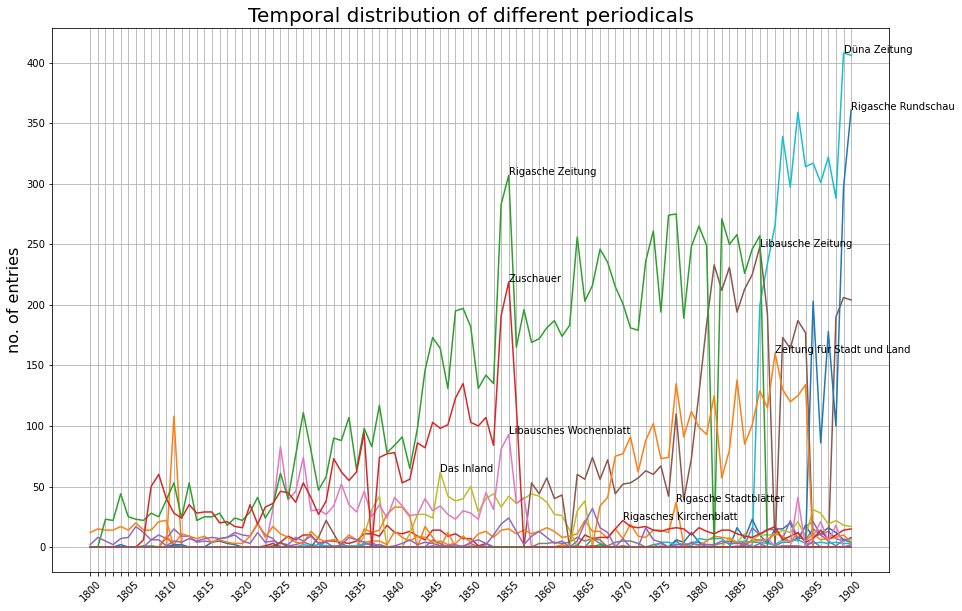

In [11]:
# create line plot for all periodicals

plt.figure(figsize=(15,10))
# get the plots from generator
[plot for plot in plot_pub_data(df)]

plt.grid(b=True, which='both')
plt.xticks(ticks=ticksrange, labels=xlabels)
plt.tick_params(axis ='x', rotation = 45)
plt.title('Temporal distribution of different periodicals', fontsize=20)
plt.ylabel('no. of entries', fontsize=16)

plt.show()





## General textual tendencies

### Text length in characters and words

<AxesSubplot:title={'center':'Word count in corpus'}, ylabel='Frequency'>

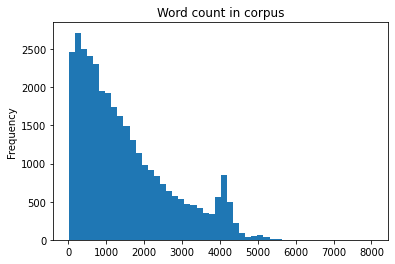

In [12]:
df.w_count.plot(kind='hist', bins=50, title='Word count in corpus')

<AxesSubplot:title={'center':'Character count in the corpus'}, ylabel='Frequency'>

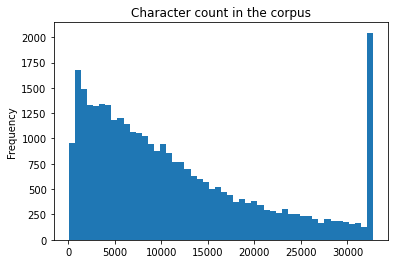

In [13]:
df.text_len.plot(kind='hist', bins=50, title='Character count in the corpus')

In [14]:
print(f'The correlation between text length in characters and in words is {df.text_len.corr(df.w_count).round(5)}')

The correlation between text length in characters and in words is 0.99449


As the graphs show, there is a spike in both the word count and character count. Because the correlation is almost 1, it seems that the texts with an unreasonably high number of characters (see second plot) correspond with the spike in the first graph (around 4000 words). I think that this may be due to OCR that sometimes erroneusly generates long sequences of gibberish.

#### Anomalous long texts

In [37]:
longest_texts = df[df.text_len == max(df.text_len)]
print(f'There are {len(longest_texts)} longest entries that all have {max(df.text_len)} characters.')
print('\n')
print('Exploration of some anomalous entries:')
for entry in longest_texts.iloc[np.random.randint(0, high=(len(longest_texts)), size=5)].href:
    print(entry)

There are 1918 longest entries that all have 32767 characters.


Exploration of some anomalous entries:
http://periodika.lv/viewerOpener?issue=/adzr1811n282&article=DIVL8&query=Sturm
http://periodika.lv/viewerOpener?issue=/p_003_duze1899s01n123&article=DIVL198&query=Sturm
http://periodika.lv/viewerOpener?issue=/dzus1834n4018&article=DIVL12&query=St%C3%BCrme
http://periodika.lv/viewerOpener?issue=/dzus1838n4653&article=DIVL13&query=Sturm
http://periodika.lv/viewerOpener?issue=/dzus1833n3932&article=DIVL12&query=st%C3%BCrmen


It seems that certain articles have faulty or missing segmentation. 32767 characters is likely the upper bound of characters for periodika.lv

### What are the most widespread article names?

In [41]:
print('Top 30 most common article names are:')
print(df['head'].str.strip('.').value_counts()[0:30]) #Strip '.' from end of article names

Top 30 most common article names are:
Inland                           3131
Ausland                          2862
Locales                          1366
Vermischtes                      1031
Frankreich                        562
Lokales                           532
Feuilleton                        445
Telegramme                        387
St. Petersburg                    379
Deutschland                       376
Handel und Verkehr                370
Neueste Nachrichten               364
Vermischte Nachrichten            338
Rigasche Zeitung                  313
Bekanntmachungen                  295
Inländische Nachrichten           290
Riga                              254
Oesterreich                       249
Rigasche Rundschau                243
Italien                           219
Orientalische Angelegenheiten     199
England                           180
Miscellen                         163
Deutsches Reich                   141
Inhalt                            139
Korresponden

### Most common words in article names

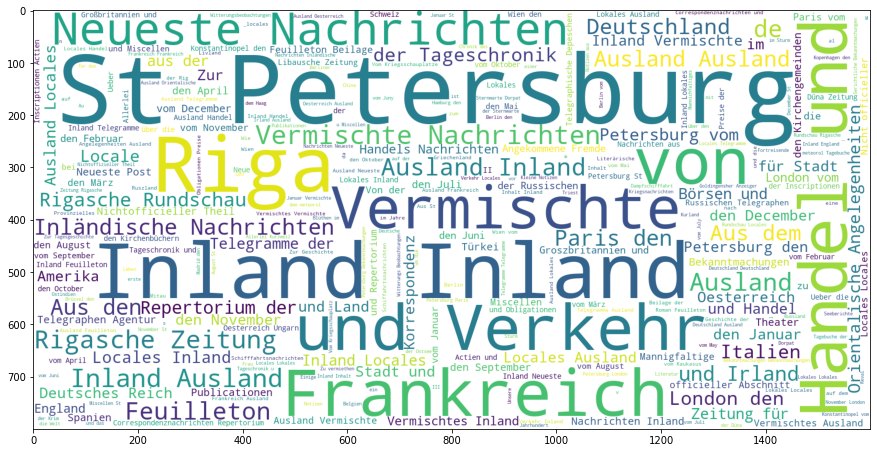

In [43]:
from wordcloud import WordCloud

wordcloud_text = ''
for entry in df['head'].str.strip('.'):
    wordcloud_text += entry
    wordcloud_text += '\n'

wordcloud = WordCloud(background_color="white",
                      width=1600,
                      height=800,
                      max_words=300,
                      contour_width=3,
                      contour_color='firebrick').generate(wordcloud_text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

plt.show()

Many articles obviously come from specific locations. The strong presence of St. Petersburg and Riga does not necessarily reflect the content of the news with these titles. Rather, the name of a city was used in the article title when the information in question had arrived from that location, regardless of what was actualy reported (e.g. an article that has 'St. Petersburg' in the title can actually be about events in Moscow, etc.). The newspapers use similar, but not identical title schemes. For example, the section "Inland" (~"domestic") could mean the the Baltic Provinces  or the Russian Empire (in the latter case, the Baltic Provinces are usually under the section "Locales").

To help narrow down the search for true positives, it is possible to disregard certain titles completely. For example, "Ausland" or different titles with foreign country/city names in them.

## Exploring the keywords

In [17]:
# group data into series that shows frequency of keyword for each year
df_st = df.groupby('year')['sturm'].apply(lambda x: x[x == True].count())
df_hg = df.groupby('year')['hagel'].apply(lambda x: x[x == True].count())
df_ub = df.groupby('year')['überschwemmung'].apply(lambda x: x[x == True].count()) 

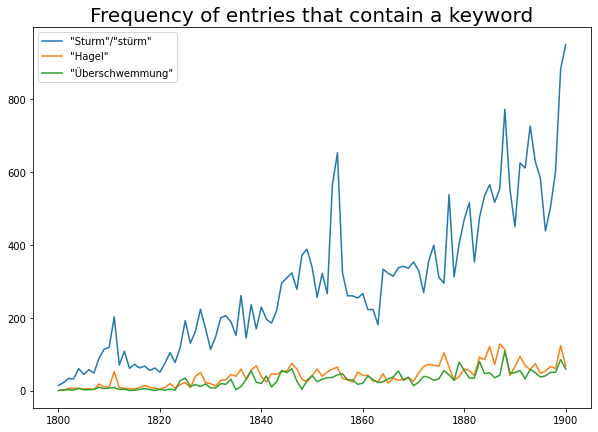

In [18]:
time = np.arange(1800,1901)

plt.figure(figsize=(10,7))

plt.plot(time, df_st.values, label='"Sturm"/"stürm"')
plt.plot(time, df_hg.values, label='"Hagel"')
plt.plot(time, df_ub.values, label='"Überschwemmung"')
plt.legend()
plt.title('Frequency of entries that contain a keyword', fontsize=20)
plt.show()

As we can see, the keyword "Sturm" makes up about 90% of the data. This is very certainly due to the metaphorical usages of the word. It is likely that only a small proportion of the storm-keywords are true positives.
It is also interesting to note that the storm-keyword frequency appears to increase more drastically in time.

Future options of using the presence of keywords can be following:
- A co-occurrence of two or more keywords represents a higher probability of a weather event